# Семинар №5 по курсу "Машинное обучение и pаспознавание образов"

# Naive Bayes, метрики


**Машинное обучение** (англ. machine learning, ML) — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, а обучение за счёт применения решений множества сходных задач. Для построения таких методов используются средства математической статистики, численных методов, математического анализа, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.

Типы машинного обучения:

* Обучение с учителем (supervised learning)
* Обучение без учителя (unsupervised learning)
* Обучение с частичным участием учителя (semi-supervised learning)
* Обучение с подкреплением (reinforcement learning)

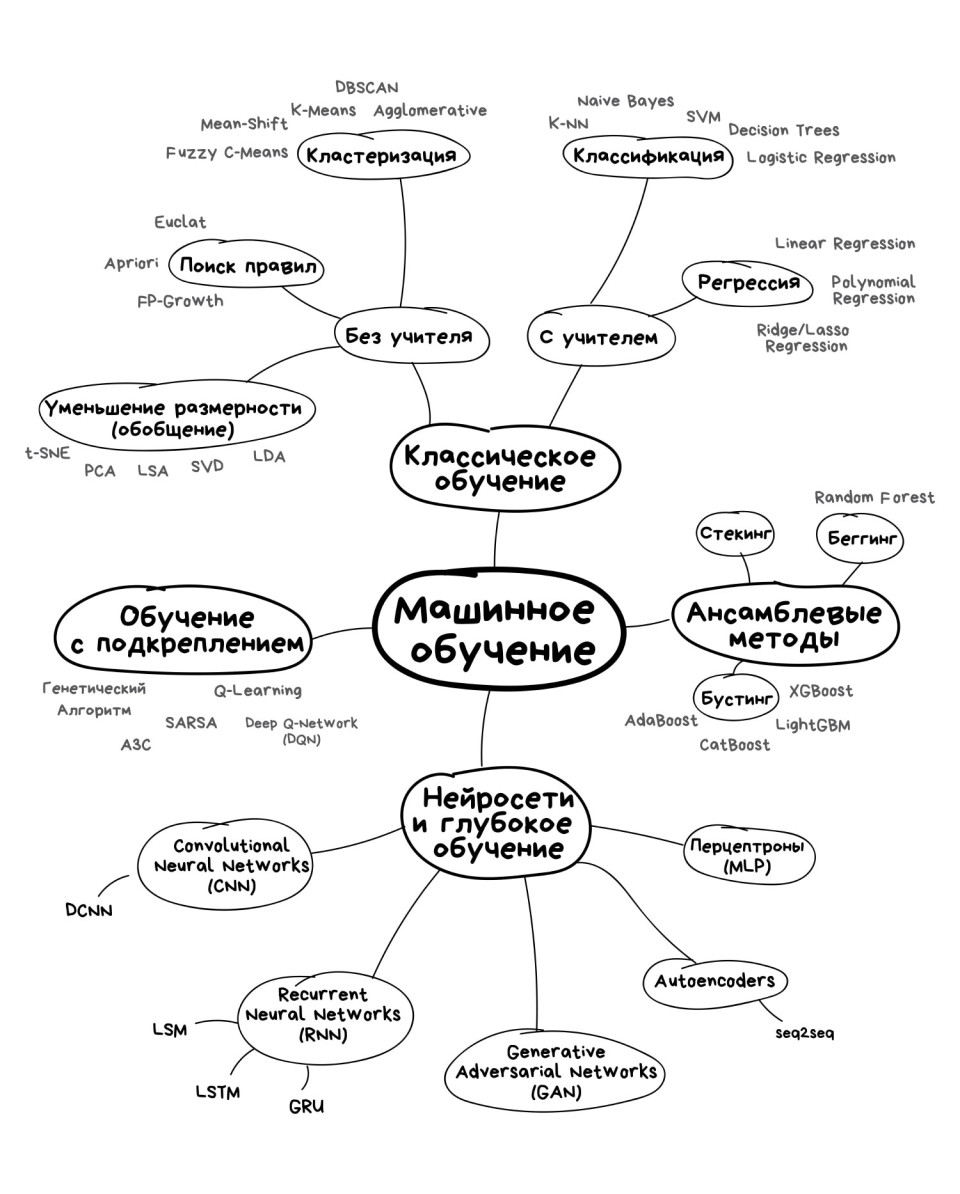

Различия машинного обучения и глубокого обучения


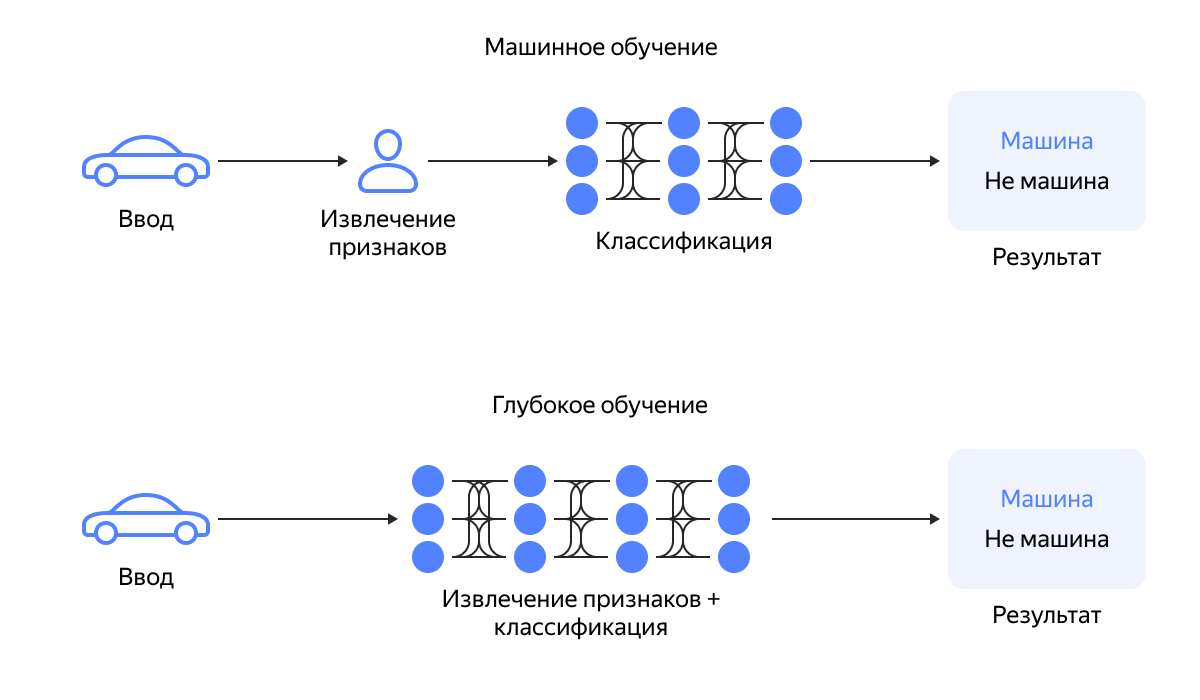

# **Наивный байесовский классификатор (Naive Bayes)**

Наивный байесовский классификатор (Naive Bayes classifier) — вероятностный классификатор на основе формулы Байеса со строгим (наивным) предположением о независимости признаков между собой при заданном классе, что сильно упрощает задачу классификации из-за оценки одномерных вероятностных плотностей вместо одной многомерной.

В данном случае, одномерная вероятностная плотность — это оценка вероятности каждого признака отдельно при условии их независимости, а многомерная — оценка вероятности комбинации всех признаков, что вытекает из случая их зависимости. Именно по этой причине данный классификатор называется наивным, поскольку позволяет сильно упростить вычисления и повысить эффективность алгоритма. Однако такое предположение не всегда является верным на практике и в ряде случаев может привести к значительному ухудшению качества прогнозов.

Сама же формула Байеса выглядит следующим образом:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

где:
- $P(A|B)$ — апостериорная вероятность события A при условии выполнения события B;

- $P(B|A)$ — условная вероятность события B при условии выполнения события A;

- $P(A)$ и $P(B)$ — априорные вероятности событий A и B соответственно.

А в контексте машинного обучения формула Байеса приобретает следующий вид:

$$P(y_k|X) = \frac{P(y_k)P(X|y_k)}{P(X)}$$

где:
- $P(y_k|X)$ — апостериорная вероятность принадлежности образца к классу $y_k$ с учётом его признаков $X$;
- $P(X|y_k)$ — правдоподобие, то есть вероятность признаков $X$ при заданном классе $y_k$;
- $P(y_k)$ — априорная вероятность принадлежности случайно выбранного наблюдения к классу $y_k$;
- $P(X)$ — априорная вероятность признаков $X$.

Если объект описывается не одним, а несколькими признаками $X_1, X_2, ..., X_n$, то формула принимает вид:

$$P(y_k|X_1, X_2, ..., X_n) = \frac{P(y_k)\prod_{i=1}^n P(X_i|y_k)}{P(X_1, X_2, ..., X_n)}$$

На практике числитель данной формулы представляет наибольший интерес, поскольку знаменатель зависит только от признаков, а не от класса, и поэтому часто он опускается при сравнении вероятностей разных классов. В конечном счёте правило классификации будет пропорционально выбору класса с максимальной апостериорной вероятностью:

$$y_k \propto \arg\max_{y_k} P(y_k)\prod_{i=1}^n P(X_i|y_k)$$

Для оценки параметров модели, то есть вероятностей $P(y_k)$ и $P(X_i|y_k)$, обычно применяется метод максимального правдоподобия, который в данном случае основан на частотах встречаемости классов и признаков в обучающей выборке.

### **Разновидности наивного Байеса**
В библиотеке scikit-learn есть несколько реализаций наивного байесовского классификатора, отличающиеся предположениями о распределении признаков при заданном классе. К таковым относятся следующие:

- **Гауссовский наивный байесовский классификатор (GaussianNB)** — вариант для работы с непрерывными признаками, которые имеют нормальное (гауссовское) распределение. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}\exp\left(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}\right)$$ где $\mu_y$ и $\sigma_y$ — это среднее и стандартное отклонения признака в классе $y$. Эти параметры оцениваются с помощью метода максимального правдоподобия по обучающим данным.
- **Мультиномиальный наивный байесовский классификатор (MultinomialNB)** — вариант для работы с дискретными признаками, которые имеют мультиномиальное распределение. Такие признаки часто встречаются в задачах классификации текстов, где они представляют собой количество вхождений в тексте. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}$$ где $N_{yi}$ — это количество раз, когда признак $i$ встречается в классе $y$; $N_y$ — общее количество всех признаков в классе $y$; $n$ — количество различных признаков; а $\alpha$ — сглаживающий параметр, предотвращающий возникновение нулевых вероятностей.
- **Комплементарный наивный байесовский классификатор (ComplementNB)** — улучшенный вариант *MultinomialNB*, подходящий для несбалансированных наборов данных. Вместо оценки вероятности признака при заданном классе, алгоритм оценивает нормированный вес признака $w_{ci}$ для класса $c$ как вероятность признака при дополнении класса, то есть при всех остальных классах. Таким образом, алгоритм учитывает не только частоту признаков в классе, но и их отсутствие в других классах, что делает его менее чувствительным к смещению выборки. Формула для вычисления вероятности признака при дополнении класса выглядит следующим образом: \begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}
где $\hat{\theta}_{ci}$ — это оценка вероятности признака $i$ при дополнении класса $c$, которая вычисляется с помощью сглаживающего параметра $\alpha_i$ и частоты признака $i$ во всех классах кроме $c$ (в данном случае $d_{ij}$ — это количество раз, когда признак $i$ встречается в классе $j$); $w_{ci}$ — это нормированный вес признака $i$ для класса $c$. Предсказанный класс $\hat c$ для заданного вектора признаков $t$ будет выглядеть следующим образом: $$\hat{c} = \arg\min_c \sum_{i} t_i w_{ci}$$
- **Бернуллиевский наивный байесовский классификатор (BernoulliNB)** — ещё один вариант для работы с дискретными признаками, но которые имеют бернуллиевское распределение. В данном случае признаки представляют собой бинарные индикаторы наличия или отсутствия определённых свойств в объекте. Например, в задаче классификации текстов это может быть наличие или отсутствие определённых слов в тексте. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i|y) = P(x_i = 1|y)x_i + (1-P(x_i = 1|y))(1-x_i)$$ где $P(x_i = 1|y)$ — это вероятность того, что признак $i$ принимает значение 1 (истина) при условии, что объект принадлежит классу $y$; $x_i$ — значение признака $i$ (0 или 1).
- **Категориальный наивный байесовский классификатор (CategoricalNB)** — вариант для категориально распределенных данных, основанный на предположении, что каждый описываемый индексом признак имеет своё собственное категориальное распределение. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i = t \mid y = c \: ;\, \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$ где $N_{tic} = |\{j \in J \mid x_{ij} = t, y_j = c\}|$ — это количество раз, когда признак $x_i$ принимает значение $t$ в классе $c$; $N_{c} = |\{ j \in J\mid y_j = c\}|$ — общее количество всех признаков в классе $c$ в обучающих данных; $\alpha$ — сглаживающий параметр; $n_i$ — количество доступных значений признака $i$.

### **Принцип работы наивного байесовского классификатора c гауссовским распределением**
Алгоритм строится следующим образом:
- 1) изначально рассчитываются априорные вероятности классов;
- 2) после рассчитываются средние и стандартные отклонения признаков по классам;
- 3) на основе полученных отклонений признаков по классам рассчитывается вероятностная плотность тестовых признаков по распределению Гаусса;
- 4) далее вычисляются апостериорные вероятности как произведение априорных вероятностей классов и вероятностных плотностей тестовых признаков;
- 5) классы с максимальной апостериорной вероятностью будут итоговым прогнозом.

## Задача

Построить классификатор на основе обучающей выборки

Дана обучающая выборка с двумя классами:

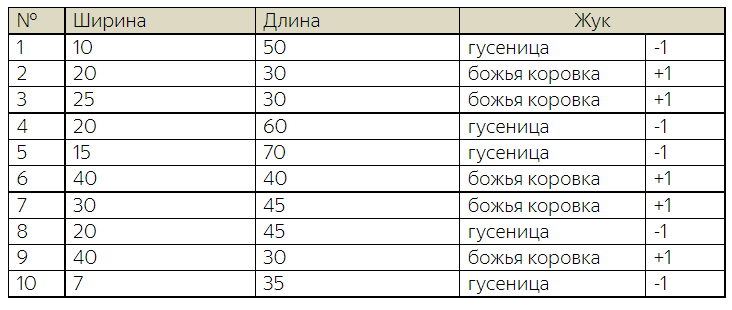

Будем предполагать, что признаки ширина и длина независимы и подчиняются нормальному закону распределения.

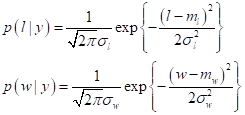



где l (length) – длина жука; w (width) – ширина;  mi, mw- математические ожидания для длины и ширины соответственно;  - дисперсии для ширины и длины соответственно.

Наша задача определить параметры гауссовских распределений по обучающей выборке. Сначала найдем МО (средние значения) признаков для обоих классов (как средние арифметические):

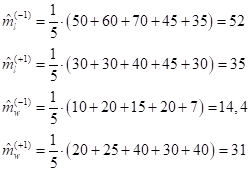

А, затем, дисперсии по формуле:

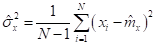

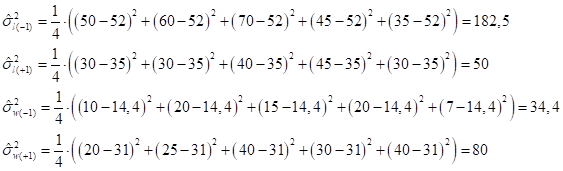

Далее, сформируем условные ПРВ для первого и второго классов по правилу:

image.png

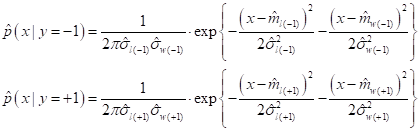

Осталось определить априорные вероятности появления классов в выборке. В нашем случае они будут равны:

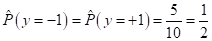

так как имеем по 5 объектов каждого класса.

Все вероятности и ПРВ определены. Теперь можно построить классификатор по правилу:

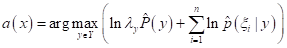

Величины штрафов возьмем одинаковыми для обоих классов:

image.png



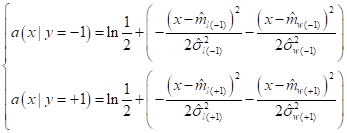

И, так как слагаемое  одинаковое у обоих классов, то его можно не учитывать:

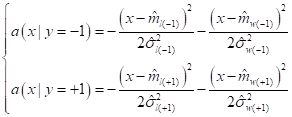

Напишем код для решения задачи выше:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#запишем данные признаков из таблицы для 2 классов
X_train = np.array([[10,50], [20,30], [25,30], [20,60], [15, 70], [40,40],
                    [30,45], [20, 45], [40,30], [7,35] ])
#запишем метки классов
y_train = np.array([0,1,1,0,0,1,1,0,1,0])

In [4]:
#рассчитаем средние значения признаков для класса 0
mean_w_0, mean_l_0 = np.mean(X_train[y_train == 0], axis=0)

#рассчитаем средние значения признаков для класса 1
mean_w_1, mean_l_1 = np.mean(X_train[y_train == 1], axis=0)

#рассчитаем ско признаков w,l значения признаков для класса 0
std_w_0, std_l_0 = np.std(X_train[y_train == 0], axis=0)

#рассчитаем ско признаков w,l значения признаков для класса 1
std_w_1, std_l_1 = np.std(X_train[y_train == 1], axis=0)

print('Среднее значение признака w {}, l {} для класса 0: '.format(mean_w_0, mean_l_0))
print('Среднее значение признака w {}, l {} для класса 1: '.format(mean_w_1, mean_l_1))
print('СКО признака w {}, l {} для класса 0: '.format(std_w_0, std_l_0))
print('СКО признака w {}, l {} для класса 1: '.format(std_w_1, std_l_1))

Среднее значение признака w 14.4, l 52.0 для класса 0: 
Среднее значение признака w 31.0, l 35.0 для класса 1: 
СКО признака w 5.238320341483518, l 12.083045973594572 для класса 0: 
СКО признака w 8.0, l 6.324555320336759 для класса 1: 


In [6]:
#рассчитаем априорные веротятности классов
p0 = X_train[y_train == 0].shape[0]/X_train.shape[0]
p1 = X_train[y_train == 1].shape[0]/X_train.shape[0]
print('p(y) класса "0" - {}, класса "1"- {} '.format( p0, p1 ))

p(y) класса "0" - 0.5, класса "1"- 0.5 


In [7]:
#функция рассчета условной вероятности
'''
x - значение признака
mean - среднее значение признака, рассчитанное по выборке
std - стадартное отклоненеи признака, рассчитанное по выборке
'''
def pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

In [8]:
#возьмем один образец для классификации из обучающей выборке для проверки
X = [10,50]

In [9]:
#рассчет условной вероятности для класса 0
pdf_w = pdf(X[0], mean_w_0, std_w_0)
pdf_l = pdf(X[1], mean_l_0, std_l_0)
pdf_0 = pdf_w * pdf_l

#рассчет условной вероятности для класса 1
pdf_w = pdf(X[0], mean_w_1, std_w_1)
pdf_l = pdf(X[1], mean_l_1, std_l_1)
pdf_1 = pdf_w * pdf_l

In [11]:
#рассчитаем апостериорную вероятность принадлежности образца к классу 0 с учётом его признаков
posterior0 = p0 * pdf_0
#к классу 1
posterior1 = p1 * pdf_1

print("Вероятность принадлежности к классу 1: {}, к классу 0: {}".format(posterior0, posterior1))

Вероятность принадлежности к классу 1: 0.0008714981910420682, к классу 0: 3.012567009112489e-06


In [13]:
#пересичтаем чтобы сумма вероятностей была равна 1
print("Вероятность принадлежности к классу 0: {}, к классу 1: {}".format(posterior0/(posterior0+posterior1), posterior1/(posterior0+posterior1)))

Вероятность принадлежности к классу 0: 0.9965551401382119, к классу 1: 0.0034448598617882057


Напишем класс с реализацией GaussianNaiveBayes для общего случая

In [14]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        classes, cls_counts = np.unique(y, return_counts=True)
        n_classes = len(classes)
        self.priors = cls_counts / len(y)

        # рассчитаем среднее и ско признаков для каждого класса
        self.X_cls_mean = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.array([np.std(X[y == c], axis=0) for c in range(n_classes)])

    # рассчитаем плотность распределения признаков согласно распределнению Гаусса
    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        posteriors = self.priors * np.prod(pdfs, axis=2)
        print(posteriors)
        return np.argmax(posteriors, axis=1)

Сверим результаты

In [15]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
gnb.predict([X])

[[8.71498191e-04 3.01256701e-06]]


array([0], dtype=int64)

Возьмем классификатор Naive Bayes из scikit-learn

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
#предсказание номера класса для объекта X
gnb.predict([X])

array([0])

In [17]:
#вывод веротяностей принадлежности объекта Х к классу 0 и 1
gnb.predict_proba([X])

array([[0.99655514, 0.00344486]])

### **Преимущества и недостатки наивного байесовского классификатора**
Преимущества:
- простота в реализации и интерпретации;
- практически не требуется настройка параметров;
- высокая скорость работы и точность прогнозов во многих ситуациях;
- имеет относительно хорошую устойчивость к шуму и выбросам, поскольку основан на вероятностных распределениях и наивном предположении о независимости признаков.

Недостатки:
- в случае нарушения предположения о независимости признаков, точность прогнозов может значительно снизиться;
- может отдавать предпочтение к классам с бОльшим количеством образцов в случае несбалансированных данных.


## Обучим классификатор для рассчета метрик

In [18]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data['data'], data['target']
# разделим выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

## Типы выборок

* Обучающая выборка - для обучения алгоритма
* Валидационная - для подбора параметров алгоритма
* Тестовая - для оценки качества работы алгоритма

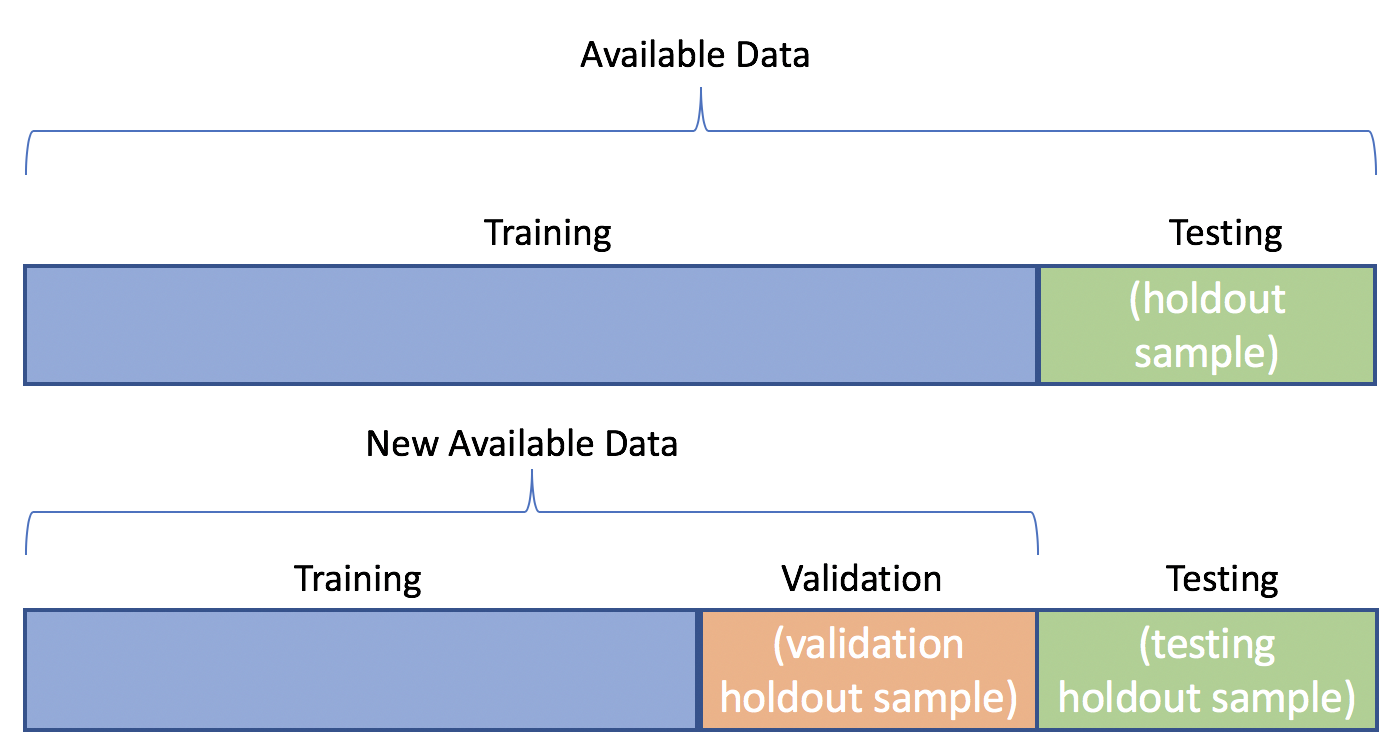

# Метрики оценки качества ML моделей для задачи бинарной классификации

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, roc_curve, roc_auc_score, precision_recall_curve,
                             auc, average_precision_score, classification_report)

Для простоты понимания рассмотрим бинарный случай. Однако, перед этим стоит тщательно ознакомиться с матрицей ошибок (confusion matrix) и её компонентами, представленными на изображении ниже.

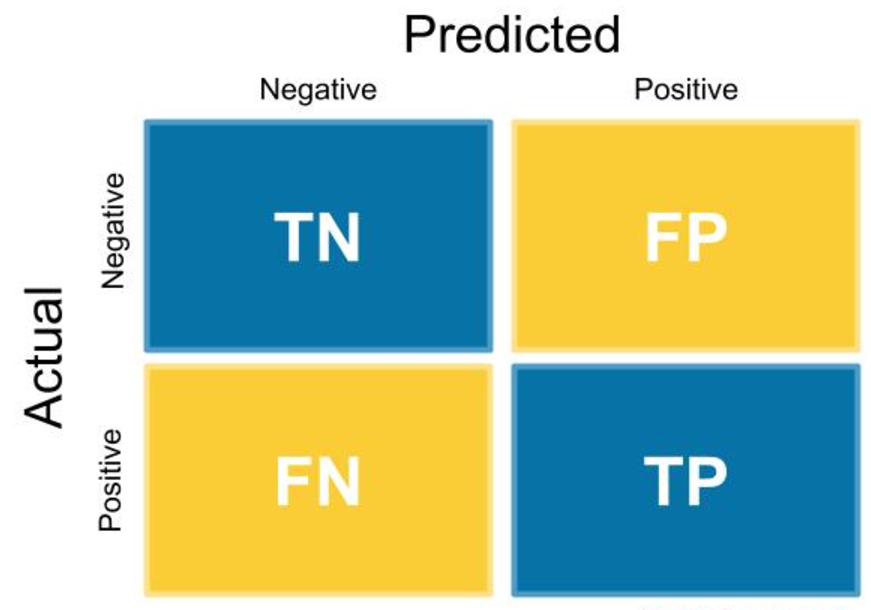

На главной диагонали расположены правильно классифицированные положительные (TP) и отрицательные (TN) классы, а на побочной — неправильно классифицированные, которые ещё называются ошибками первого (FP) и второго (FN) рода. 

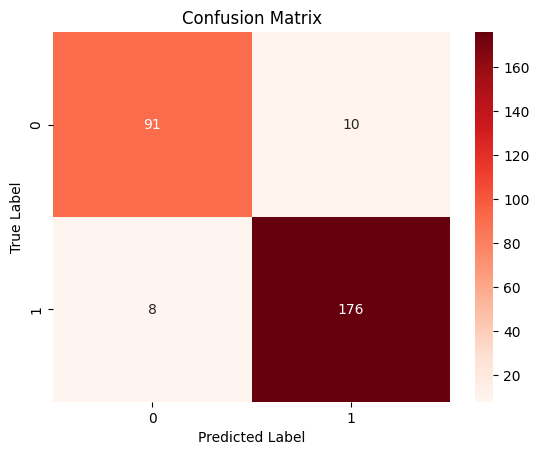

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Пример интерпретации матрицы ошибок**

Глядя на полученную матрицу ошибок, мы имеем следующее:
- (True Negative) — 91 человека классифицированы как больные и они такими являются, то есть классифицированы верно;
- (True Positive) — 176 человека классифицированы как здоровые и они такими являются, то есть также классифицированы верно;
- (False Negative) — 8 человек классифицированы как больные, но они здоровые;
- (False Positive) — 10 человек определён как здоровый, но он болен.

### **Accuracy**

Самым простым способом оценить качество модели является **Accuracy** или точность, которая отражает долю правильно спрогнозированных классов среди всех образцов:

$$\text{Accuracy} = \frac{1}{N} \sum_{i=1}^{N} I [y_i = \hat y_i] = \frac{TP + TN}{TP + TN + FP + FN}$$

Теперь получим значение Accuracy для нашего примера:

$$\frac{91 + 176}{91 + 176 + 10 + 8} = 0.9368421052631579$$

Отсюда также можно определить долю ошибочных классификаций **Error rate**, которая показывает напрямую, как часто модель совершает ошибки:

$$1 - \text{Accuracy} = 1 - 0.9368421052631579 = 0.06315789473684208$$

In [21]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f'Accuracy: {accuracy}')
print(f'Error rate: {error_rate}')

Accuracy: 0.9368421052631579
Error rate: 0.06315789473684208


Не смотря на свою простоту и универсальность, Accuracy имеет ряд серьёзных недостатков:
- не учитывает дисбаланс классов: если один класс значительно преобладает над другим, то модель может быть смещена в его сторону, и тогда высокая точность не будет отражать истинное качество модели;
- не даёт информацию о типе ошибок модели, например, о количестве ложноположительных и ложноотрицательных результатов, что не позволяет учитывать цену ошибки для разных классов;
- зависит от порога классификации, изменение которого может значительно повлиять на значение точности.

Далее будут рассмотрены метрики, в которых устраняются данные недостатки.

### **Precision**

Характеризует долю правильно предсказанных положительных классов среди всех образцов, которые модель спрогнозировала как положительный класс:

$$\text{Precision} = TPR = \frac{TP}{TP + FP} = \frac{176}{176 + 10} = 0.946236559139785$$

In [22]:
precision = precision_score(y_test, y_pred)
print(precision)

0.946236559139785


Чем меньше ложноположительных прогнозов, тем выше Precision модели.

### **Recall (TPR)**

Ещё известное как True Positive Rate, отражает долю правильно предсказанных положительных классов среди всех реальных положительных образцов:

$$\text{Recall} = \frac{TP}{TP + FN} = \frac{176}{176 + 8} = 0.9565217391304348$$

In [23]:
recall = recall_score(y_test, y_pred)
print(recall)

0.9565217391304348


Чем меньше ложноотрицательных прогнозов, тем выше Recall или TPR.

### **F1-score**

Представляет собой гармоническое среднее между Precision и Recall, обеспечивая между ними баланс, что особенно полезно при неравномерном распределении классов.

$$\text{F1-score} = 2 \cdot \frac{precision \cdot recall}{precision + recall} \approx 2 \frac{0.9462 \cdot 0.9565}{0.9462 + 0.9565} \approx 0.9513513513513514$$

In [24]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.9513513513513514
